Using device: cpu


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


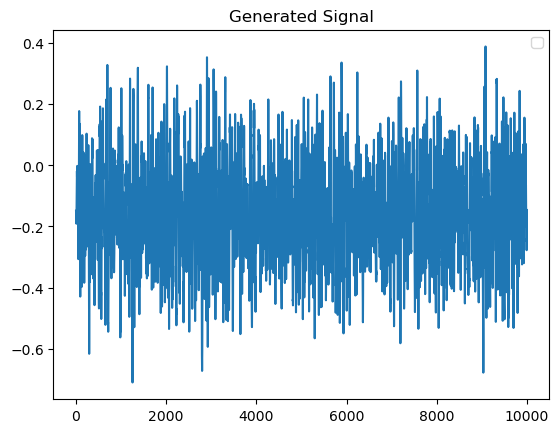

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


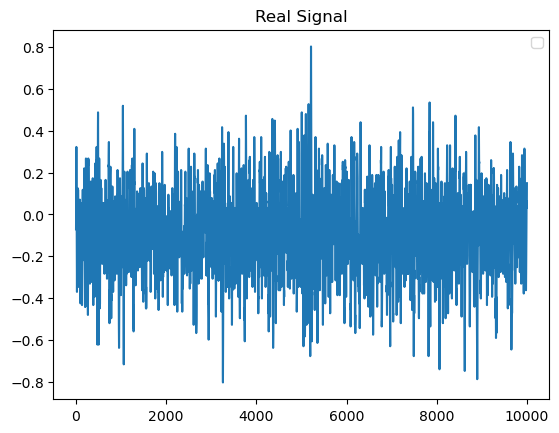

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gan_v1 import GAN_Generator

# Helper function to scale and process "real" data into sequences of size 10000
def split_into_sequences(df, sequence_length):
    data = df['Intensity'].values
    
    # Scaling data to be between -1 and 1
    data_min = data.min()
    data_max = data.max()
    data = 2 * (data - data_min) / (data_max - data_min) - 1
    
    # Splitting into sequences
    num_sequences = len(data) // sequence_length
    sequences = np.array([data[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)])
    
    return sequences

# Check for GPU support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the trained VAE model
gan_generator = torch.load('saved_models/gan_generator_v1.pth', map_location=device)
gan_generator.eval()

# Load and preprocess the real data
def preprocess_data(file_path, sequence_length):
    df = pd.read_csv(file_path)
    sequences = split_into_sequences(df, sequence_length)
    return sequences

# Define the file path and sequence length
file_path = 'puf_dataset_07_14/2Can-D7-50mA-long1.csv'
sequence_length = 10000
X = preprocess_data(file_path, sequence_length)

# Generate a random latent vector, latent dimension matches 
latent_dim = 20
z = torch.randn(1, latent_dim).to(device)  # 1 sample with the same latent dimension

# Generate a signal and reshape or flatten the signal as necessary
with torch.no_grad():
    generated_signal = gan_generator(z).cpu().numpy()
generated_signal = generated_signal.flatten()

# Select a real signal from your dataset for comparison
real_signal = X[0]

# Plot the generated and real signals and save the figures
plt.plot(generated_signal)
plt.legend()
plt.title('Generated Signal')
plt.savefig('figures/gan/generated_signal.png')
plt.show()

plt.plot(real_signal)
plt.legend()
plt.title('Real Signal')
plt.savefig('figures/gan/real_signal.png')
plt.show()